3.0
3.0
2.0
4.0
1.0
5.0
6.0


C:\Users\Rick\PycharmProjects\pythonProject1\visualization\creature_rendering.py:13: RuntimeWarning: invalid value encountered in double_scalars
  slope = (y1 - y0) / (x1 - x0)
C:\Users\Rick\PycharmProjects\pythonProject1\visualization\creature_rendering.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  step_size = 1 / length_of_line
C:\Users\Rick\PycharmProjects\pythonProject1\visualization\creature_rendering.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  slope = (y1 - y0) / (x1 - x0)


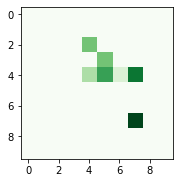

{'world_size': 10,
 'global_creature_id_counter': 7,
 'world_array': array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 3., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 3., 0., 0., 0., 0.],
        [0., 0., 0., 0., 2., 4., 1., 5., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 6., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 'carbon_dioxide_map': array([[5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5],
        [5, 5, 5, 5, 5, 5, 5, 5, 5, 5]]),
 'plan

In [1]:
%reload_ext autoreload
%autoreload

import numpy as np
import creature_spawning.spawn_creature as sc
import visualization.creature_rendering as creature_render
import visualization.array_rendering as ar

def photosynthesize(world_params):
    for plant_id in world_params['world_array'][np.nonzero(world_params['world_array'])]:
        print(plant_id)


world_params = { 'world_size': 10,
                 'global_creature_id_counter': 0 }

world_params['world_array'] = np.zeros(shape=(world_params['world_size'], world_params['world_size']))

world_params['carbon_dioxide_map'] = np.full(shape=(world_params['world_size'], world_params['world_size']),
                             fill_value=5)

sc.spawn_new_plants(world_params=world_params,
                             num_plants=7)

creature_render.place_creatures(world_params)

photosynthesize(world_params)

ar.render_array(world_params['world_array'])

world_params